Problem 1: Data from yfinance
## YFINANCE
Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

• Facebook (META)

• Apple (AAPL)

• Amazon (AMZN)

• Netflix (NFLX)

• Google (GOOG)

The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two-digit day, and HHmmss is hour, minutes, seconds. Create the data folder if you don't already have one.


https://github.com/ranaroussi/yfinance

In [144]:
# Import Dates and Times
import datetime as dt

# Importing yfinance and getting the data ready to run
import yfinance as yf

# Importing Data Frames
import pandas as pd

In [145]:
dat = yf.Ticker("META")

In [146]:
dat.info

{'address1': '1 Meta Way',
 'city': 'Menlo Park',
 'state': 'CA',
 'zip': '94025',
 'country': 'United States',
 'phone': '650 543 4800',
 'website': 'https://investor.atmeta.com',
 'industry': 'Internet Content & Information',
 'industryKey': 'internet-content-information',
 'industryDisp': 'Internet Content & Information',
 'sector': 'Communication Services',
 'sectorKey': 'communication-services',
 'sectorDisp': 'Communication Services',
 'longBusinessSummary': 'Meta Platforms, Inc. engages in the development of products that enable people to connect and share with friends and family through mobile devices, personal computers, virtual reality and mixed reality headsets, augmented reality, and wearables worldwide. It operates through two segments, Family of Apps (FoA) and Reality Labs (RL). The FoA segment offers Facebook, which enables people to build community through feed, reels, stories, groups, marketplace, and other; Instagram that brings people closer through instagram feed, s

In [147]:
dat.calendar

{'Dividend Date': datetime.date(2025, 9, 29),
 'Ex-Dividend Date': datetime.date(2025, 9, 22),
 'Earnings Date': [datetime.date(2026, 1, 28)],
 'Earnings High': 9.79,
 'Earnings Low': 7.23,
 'Earnings Average': 8.1869,
 'Revenue High': 59653000000,
 'Revenue Low': 53797000000,
 'Revenue Average': 58191585670}

In [148]:
dat.analyst_price_targets

{'current': 629.9703,
 'high': 1117.0,
 'low': 560.0,
 'mean': 843.08215,
 'median': 850.0}

In [149]:
dat.quarterly_income_stmt

,2025-06-30,2025-03-31,2024-12-31,2024-09-30,2024-06-30
Tax Effect Of Unusual Items,2.156000e+07,2.088000e+07,-4.436523e+07,1.320000e+06,-1.825023e+07
Tax Rate For Calcs,1.100000e-01,9.000000e-02,1.152340e-01,1.200000e-01,1.086320e-01
Normalized EBITDA,2.492100e+10,2.229000e+10,2.864800e+10,2.204600e+10,1.903900e+10
Total Unusual Items,1.960000e+08,2.320000e+08,-3.850000e+08,1.100000e+07,-1.680000e+08
Total Unusual Items Excluding Goodwill,1.960000e+08,2.320000e+08,-3.850000e+08,1.100000e+07,-1.680000e+08
Net Income From Continuing Operation Net Minority Interest,1.833700e+10,1.664400e+10,2.083800e+10,1.568800e+10,1.346500e+10
Reconciled Depreciation,4.342000e+09,3.900000e+09,4.460000e+09,4.027000e+09,3.637000e+09
Reconciled Cost Of Revenue,8.491000e+09,7.572000e+09,8.839000e+09,7.375000e+09,7.308000e+09
EBITDA,2.511700e+10,2.252200e+10,2.826300e+10,2.205700e+10,1.887100e+10
EBIT,2.077500e+10,1.862200e+10,2.380300e+10,1.803000e+10,1.523400e+10


In [150]:
dat.history(period='5d')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-10-29 00:00:00-04:00,754.750000,759.159973,742.510010,751.669983,26818600,0.0,0.0
2025-10-30 00:00:00-04:00,669.150024,680.960022,650.169983,666.469971,88440100,0.0,0.0
2025-10-31 00:00:00-04:00,674.510010,674.890015,645.570007,648.349976,56953200,0.0,0.0
2025-11-03 00:00:00-05:00,656.000000,659.330017,636.179993,637.710022,33003600,0.0,0.0
2025-11-04 00:00:00-05:00,628.039978,641.739929,626.330017,629.950500,21144485,0.0,0.0


In [151]:
dat.option_chain(dat.options[0]).calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,META251107C00100000,2025-11-04 19:29:42+00:00,100.0,531.40,525.25,531.00,-22.569946,-4.074218,6,5,8.097661,True,REGULAR,USD
1,META251107C00300000,2025-11-04 19:33:36+00:00,300.0,329.70,325.35,331.75,-8.299988,-2.455618,8,5,3.712891,True,REGULAR,USD
2,META251107C00320000,2025-10-30 13:32:38+00:00,320.0,335.85,305.40,311.80,0.000000,0.000000,1,30,3.438478,True,REGULAR,USD
3,META251107C00330000,2025-10-30 13:45:25+00:00,330.0,332.70,295.00,301.80,0.000000,0.000000,1,5,3.298830,True,REGULAR,USD
4,META251107C00340000,2025-11-04 18:25:08+00:00,340.0,290.31,285.50,291.80,-85.489990,-22.748800,2,12,3.163576,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,META251107C01040000,2025-11-04 16:25:54+00:00,1040.0,0.01,0.00,0.01,-0.040000,-80.000010,740,77,1.343753,False,REGULAR,USD
150,META251107C01050000,2025-11-04 16:25:55+00:00,1050.0,0.01,0.00,0.01,0.000000,0.000000,780,127,1.375003,False,REGULAR,USD
151,META251107C01060000,2025-11-04 16:25:56+00:00,1060.0,0.01,0.00,0.01,0.000000,0.000000,740,434,1.375003,False,REGULAR,USD
152,META251107C01070000,2025-11-03 19:42:28+00:00,1070.0,0.01,0.00,0.01,0.000000,0.000000,165,7753,1.406253,False,REGULAR,USD


In [152]:
# Let's have a look at the index of our dataframe
type(df)

pandas.core.frame.DataFrame

In [153]:
# The Index
df.index

DatetimeIndex(['2025-10-29 13:30:00+00:00', '2025-10-29 14:30:00+00:00',
               '2025-10-29 15:30:00+00:00', '2025-10-29 16:30:00+00:00',
               '2025-10-29 17:30:00+00:00', '2025-10-29 18:30:00+00:00',
               '2025-10-29 19:30:00+00:00', '2025-10-30 13:30:00+00:00',
               '2025-10-30 14:30:00+00:00', '2025-10-30 15:30:00+00:00',
               '2025-10-30 16:30:00+00:00', '2025-10-30 17:30:00+00:00',
               '2025-10-30 18:30:00+00:00', '2025-10-30 19:30:00+00:00',
               '2025-10-31 13:30:00+00:00', '2025-10-31 14:30:00+00:00',
               '2025-10-31 15:30:00+00:00', '2025-10-31 16:30:00+00:00',
               '2025-10-31 17:30:00+00:00', '2025-10-31 18:30:00+00:00',
               '2025-10-31 19:30:00+00:00', '2025-11-03 14:30:00+00:00',
               '2025-11-03 15:30:00+00:00', '2025-11-03 16:30:00+00:00',
               '2025-11-03 17:30:00+00:00', '2025-11-03 18:30:00+00:00',
               '2025-11-03 19:30:00+00:00', '2025-1

In [154]:
# Print data frame to CSV
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
print (df.to_csv())

Price,Close,Close,Close,Close,Close,High,High,High,High,High,Low,Low,Low,Low,Low,Open,Open,Open,Open,Open,Volume,Volume,Volume,Volume,Volume
Ticker,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,
2025-10-29 13:30:00+00:00,270.4200134277344,229.1300048828125,269.9599914550781,750.1400146484375,1106.4300537109375,271.4100036621094,232.80999755859375,270.9599914550781,759.155029296875,1108.22998046875,268.70001220703125,227.75999450683594,268.42999267578125,745.1400146484375,1096.0,269.2749938964844,231.6719970703125,268.6050109863281,754.75,1099.0999755859375,10209230,14210522,4212983,4227356,778803
2025-10-29 14:30:00+00:00,267.6300048828125,230.53500366210938,271.239990234375,748.5,1102.2301025390625,270.44500732421875,231.2949981689453,271.7749938964844,750.77001953125,1107.5,267.51220703125,228.86000061035156,269.6000061035156,746.5,1098.0,270.4100036621094,229.1199951171875

In [155]:
# Save data frame to CSV
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
df.to_csv('data.csv')

## Dates and Times

https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

In [156]:
# Current date and time
now = dt.datetime.now()

# Show current date and time
now


datetime.datetime(2025, 11, 4, 20, 38, 45, 218990)

In [157]:
# Format date and time
now.strftime("%Y%m%d-%H%M%S")

'20251104-203845'

In [158]:
# File name
now.strftime("%Y%m%d-%H%M%S") + ".csv"

'20251104-203845.csv'

In [159]:
 # Save data frame to CSV
now= dt.datetime.now()
df.to_csv(now.strftime("%Y%m%d-%H%M%S") + ".csv")


In [160]:
tickers = yf.Tickers('META AAPL GOOG')

In [161]:
df = yf.download(['META', 'AAPL','AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')

# Show
df

/tmp/ipykernel_2510/3471452824.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['META', 'AAPL','AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')
[*********************100%***********************]  5 of 5 completed


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-10-29 13:30:00+00:00  270.420013  229.130005  269.959991  750.140015   
2025-10-29 14:30:00+00:00  267.630005  230.535004  271.239990  748.500000   
2025-10-29 15:30:00+00:00  268.619995  231.367996  272.605011  750.469971   
2025-10-29 16:30:00+00:00  269.930115  230.372192  272.869995  749.570007   
2025-10-29 17:30:00+00:00  270.809998  229.690002  273.940094  748.505005   
2025-10-29 18:30:00+00:00  268.309998  228.860001  273.716095  747.599976   
2025-10-29 19:30:00+00:00  269.730011  230.339996  275.829987  752.000000   
2025-10-30 13:30:00+00:00  269.089996  226.679993  289.665009  661.510010   
2025-10-30 14:30:00+00:00  270.790009  227.960007  289.000000  662.929993   
2025-10-30 15:30:00+00:00  272.010010  226.119995  286.690002  677.950012   
2025-10-30 16:30:00+00:00  271.950012  225.419998  286.062500  678.200012   
2025-10-30 17:30:00+00:00  271.750000  225.089996  284.129913  668.950012   
2025-10-30 18:30:00+00:00  271.339996  224.391006  284.139008  667.640015   
2025-10-30 19:30:00+00:00  271.290009  222.770004  281.820007  666.119995   
2025-10-31 13:30:00+00:00  270.380005  246.550003  278.899994  657.994995   
2025-10-31 14:30:00+00:00  271.299988  247.789993  281.269989  656.479980   
2025-10-31 15:30:00+00:00  272.434998  245.800003  279.410004  652.000000   
2025-10-31 16:30:00+00:00  270.348785  246.024994  280.339996  652.989990   
2025-10-31 17:30:00+00:00  271.809998  247.600006  280.799988  648.273010   
2025-10-31 18:30:00+00:00  272.105011  246.852203  281.450012  652.289978   
2025-10-31 19:30:00+00:00  270.250000  244.220001  281.920013  648.340027   
2025-11-03 14:30:00+00:00  267.630005  255.339996  283.109985  648.506592   
2025-11-03 15:30:00+00:00  266.640015  255.460007  282.940002  649.875000   
2025-11-03 16:30:00+00:00  267.535004  256.010315  282.839996  650.169983   
2025-11-03 17:30:00+00:00  267.678009  256.510010  282.709991  644.140015   
2025-11-03 18:30:00+00:00  267.309998  255.065002  283.299988  644.460022   
2025-11-03 19:30:00+00:00  267.619995  254.869995  285.109985  642.369995   
2025-11-03 20:30:00+00:00  269.059998  254.059998  284.250000  637.719971   
2025-11-04 14:30:00+00:00  268.429993  253.389999  280.269989  635.355774   
2025-11-04 15:30:00+00:00  270.609985  252.440094  279.376099  631.979980   
2025-11-04 16:30:00+00:00  270.010010  250.955002  278.250000  631.544983   
2025-11-04 17:30:00+00:00  270.638397  249.869995  277.450012  629.431702   
2025-11-04 18:30:00+00:00  270.510406  249.750000  278.679993  630.210022   
2025-11-04 19:30:00+00:00  270.090515  249.429993  277.859985  629.520020   
2025-11-04 20:30:00+00:00  270.221008  249.720001  278.070007  629.970276   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-10-29 13:30:00+00:00  1106.430054  271.410004  232.809998  270.959991   
2025-10-29 14:30:00+00:00  1102.230103  270.445007  231.294998  271.774994   
2025-10-29 15:30:00+00:00  1103.510010  268.859985  231.610001  273.149994   
2025-10-29 16:30:00+00:00  1098.969971  269.930115  231.419998  272.980713   
2025-10-29 17:30:00+00:00  1102.739990  270.850006  230.431000  274.119995   
2025-10-29 18:30:00+00:00  1099.099976  270.929993  230.119995  274.399994   
2025-10-29 19:30:00+00:00  1100.390015  270.380005  230.619995  275.920013   
2025-10-30 13:30:00+00:00  1100.060059  274.140015  228.000000  291.899994   
2025-10-30 14:30:00+00:00  1092.712158  271.170013  228.429993  290.671387   
2025-10-30 15:30:00+00:00  1095.434448  272.390015  227.979996  290.589996   
2025-10-30 16:30:00+00:00  1097.204956  272.067810  226.360

In [162]:
type(df)

pandas.core.frame.DataFrame

In [163]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

In [164]:
df.index

DatetimeIndex(['2025-10-29 13:30:00+00:00', '2025-10-29 14:30:00+00:00',
               '2025-10-29 15:30:00+00:00', '2025-10-29 16:30:00+00:00',
               '2025-10-29 17:30:00+00:00', '2025-10-29 18:30:00+00:00',
               '2025-10-29 19:30:00+00:00', '2025-10-30 13:30:00+00:00',
               '2025-10-30 14:30:00+00:00', '2025-10-30 15:30:00+00:00',
               '2025-10-30 16:30:00+00:00', '2025-10-30 17:30:00+00:00',
               '2025-10-30 18:30:00+00:00', '2025-10-30 19:30:00+00:00',
               '2025-10-31 13:30:00+00:00', '2025-10-31 14:30:00+00:00',
               '2025-10-31 15:30:00+00:00', '2025-10-31 16:30:00+00:00',
               '2025-10-31 17:30:00+00:00', '2025-10-31 18:30:00+00:00',
               '2025-10-31 19:30:00+00:00', '2025-11-03 14:30:00+00:00',
               '2025-11-03 15:30:00+00:00', '2025-11-03 16:30:00+00:00',
               '2025-11-03 17:30:00+00:00', '2025-11-03 18:30:00+00:00',
               '2025-11-03 19:30:00+00:00', '2025-1

## End

Problem 2: Plotting Data
Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png. Create the plots folder if you don't already have one.

In [165]:
import matplotlib as plot

<Axes: xlabel='Datetime'>

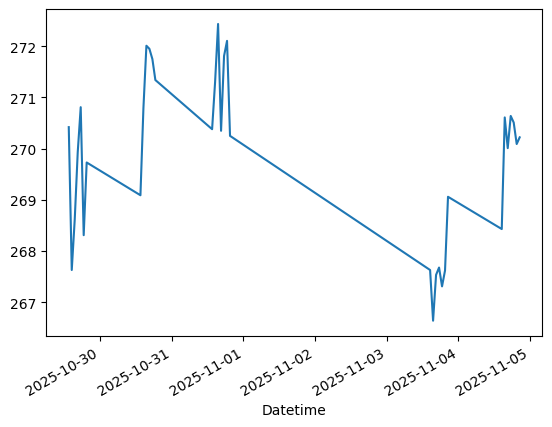

In [166]:
df[('Close', 'AAPL')].plot()

Problem 3: Script
Create a Python script called faang.py in the root of your repository. Copy the above functions into it and it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook.

Problem 4: Automation
Create a GitHub Actions workflow to run your script every Saturday morning. The script should be called faang.yml in a .github/workflows/ folder in the root of your repository. In your notebook, explain each of the individual lines in your workflow.